In [1]:
import pandas as pd
import causalpy as cp

import matplotlib.pyplot as plt

/var/folders/7y/1sc444156hvdhmc0m6ds3wfr0000gp/T/ipykernel_13424/1658083700.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
COLORS = [
    '#00B0F0',
    '#FF0000',
    '#B0F000',
    '#EC9704'
]

# Chapter 11.2

For this notebook use the environment `causal-pymc`

To install it:

`conda create -f causal-pymc.yml`

## Causality & Time Series: When An Econometrician Goes Bayesian

### Data

In [3]:
# Read in the data
data = pd.read_csv(r'./data/gt_social_media_data.csv')

In [4]:
data.head()

,date,twitter,linkedin,tiktok,instagram
0,2022-05-15,55,9,23,59
1,2022-05-16,54,18,20,59
2,2022-05-17,54,20,23,57
3,2022-05-18,54,20,21,55
4,2022-05-19,49,23,21,52


In [5]:
# Datetime to index 
data.index = pd.to_datetime(data['date'])
data = data.drop('date', axis=1)

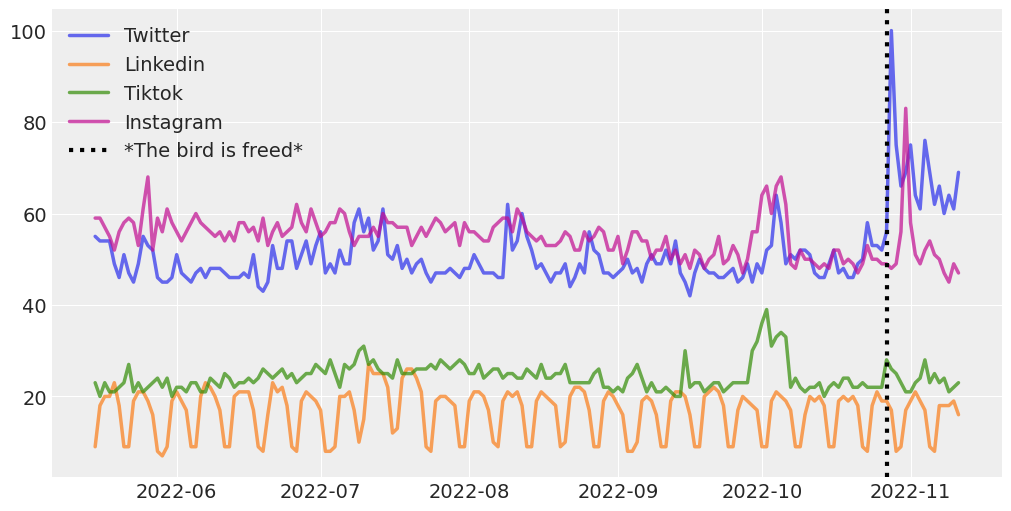

In [6]:
# Plot the data
plt.figure(figsize=(10, 5))

for i, series in enumerate(data.columns):
    plt.plot(data[series], label=series.title(), lw=2.5, alpha=.7)
    
plt.axvline(pd.to_datetime('2022-10-27'), color='black', lw=3, ls='dotted', label='*The bird is freed*')
plt.legend()
plt.show()

In [7]:
# Get the treatment time index
treatment_index = pd.to_datetime('2022-10-28')

### Modeling

In [8]:
# Build the model
model = cp.pymc_models.WeightedSumFitter()

# Define the model
formula = 'twitter ~ 0 + tiktok + linkedin + instagram'

# Run the experiment
results = cp.pymc_experiments.SyntheticControl(
    data,
    treatment_index,
    formula=formula,
    model=model,
)

/Users/IFLM/anaconda3/envs/causal-pymc/lib/python3.9/site-packages/pymc/model/core.py:568: FutureWarning: Model.model property is deprecated. Just use Model.
  warnings.warn("Model.model property is deprecated. Just use Model.", FutureWarning)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 5 seconds.
Sampling: [beta, sigma, y_hat]
Sampling: [y_hat]
/Users/IFLM/anaconda3/envs/causal-pymc/lib/python3.9/site-packages/pymc/model/core.py:568: FutureWarning: Model.model property is deprecated. Just use Model.
  warnings.warn("Model.model property is deprecated. Just use Model.", FutureWarning)
/Users/IFLM/anaconda3/envs/causal-pymc/lib/python3.9/site-packages/pymc/model/core.py:568: FutureWarning: Model.model property is deprecated. Just use Model.
  warnings.warn("Model.model property is deprecated. Just use Model.", FutureWarning)
Sampling: [y_hat]
/Users/IFLM/anaconda3/envs/causal-pymc/lib/python3.9/site-packages/pymc/model/core.py:568: FutureWarning: Model.model property is deprecated. Just use Model.
  warnings.warn("Model.model property is deprecated. Just use Model.", FutureWarning)
Sampling: [y_hat]
/Users/IFLM/anaconda3/envs/causal-pymc/lib/python3.9/site-packages/pymc/model/co

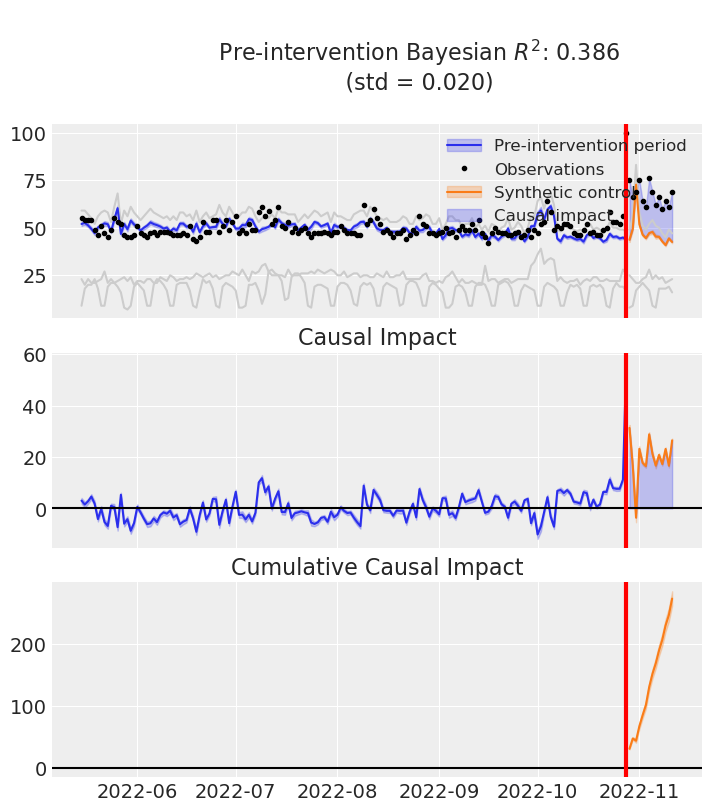

In [9]:
# Plot results
results.plot(plot_predictors=True)
plt.show()

In [10]:
# Print results summary
results.summary()

===============================Synthetic Control================================
Formula: twitter ~ 0 + tiktok + linkedin + instagram
Model coefficients:
tiktok                        0.08, 94% HDI [0.01, 0.17]
linkedin                      0.09, 94% HDI [0.01, 0.15]
instagram                     0.84, 94% HDI [0.81, 0.87]
sigma                         5.78, 94% HDI [5.28, 6.32]
